# Ejercicio 2 - Análisis de condiciones de vivienda en México usando datos del INEGI
# Fase 1: CARGA Y EXPLORACIÓN GENERAL por Eduardo | Rama: Eduardo

**1.- Importación de librerias**

In [2]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

**1.2- Cargamos el dataset con polars.**

In [3]:
df = pl.read_csv(
    "~/Descargas/datasets/viviendas.csv",
    null_values="&",
    infer_schema_length=10000,
    ignore_errors=True
)

df.head()

folioviv,tipo_viv,mat_pared,mat_techos,mat_pisos,antiguedad,antigua_ne,cocina,cocina_dor,cuart_dorm,num_cuarto,disp_agua,dotac_agua,excusado,uso_compar,sanit_agua,biodigest,bano_comp,bano_excus,bano_regad,drenaje,disp_elect,focos_inca,focos_ahor,combustible,estufa_chi,eli_basura,tenencia,renta,estim_pago,pago_viv,pago_mesp,tipo_adqui,viv_usada,tipo_finan,num_dueno1,hog_dueno1,num_dueno2,hog_dueno2,escrituras,lavadero,fregadero,regadera,tinaco_azo,cisterna,pileta,calent_sol,calent_gas,medidor_luz,bomba_agua,tanque_gas,aire_acond,calefacc,tot_resid,tot_hom,tot_muj,tot_hog,ubica_geo,tam_loc,est_socio,est_dis,upm,factor,procaptar
i64,i64,i64,i64,i64,str,str,i64,str,i64,i64,i64,str,i64,str,str,str,str,str,str,i64,i64,str,str,i64,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
100005002,1,8,10,3,"""30""",""" """,1,"""2""",2,4,1,"""1""",1,"""2""","""1""","""2""","""1""","""0""","""0""",1,1,"""0""","""8""",3,""" """,3,4,""" ""","""4000""",""" """,""" ""","""1""","""2""","""1""","""01""","""1""",""" """,""" ""","""1""",2,1,1,1,1,2,1,1,1,1,2,2,2,3,0,3,1,1001,1,4,3,1,206,0
100005003,1,8,10,3,"""15""",""" """,1,"""2""",3,5,1,"""1""",1,"""2""","""1""","""2""","""3""","""1""","""0""",1,1,"""0""","""9""",4,""" """,3,1,"""8500""",""" """,""" ""","""1""",""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" """,1,1,1,1,1,2,1,1,1,1,1,2,2,2,1,1,1,1001,1,4,3,1,206,0
100005004,1,8,10,3,"""25""",""" """,1,"""2""",3,7,1,"""1""",1,"""2""","""1""","""2""","""2""","""1""","""0""",1,1,"""0""","""10""",3,""" """,3,4,""" ""","""10000""",""" """,""" ""","""1""","""2""","""5""","""01""","""1""",""" """,""" ""","""1""",1,1,1,1,1,1,1,1,1,1,2,2,2,3,2,1,1,1001,1,4,3,1,206,0
100012002,1,8,10,3,"""50""",""" """,1,"""2""",4,6,1,"""1""",1,"""2""","""1""","""2""","""2""","""0""","""0""",1,1,"""9""","""8""",4,""" """,3,4,""" ""","""5000""",""" """,""" ""","""1""","""2""","""1""","""01""","""1""",""" """,""" ""","""1""",1,1,1,1,1,2,1,1,1,1,2,2,2,5,3,2,2,1001,1,3,2,2,167,0
100012004,1,8,10,3,"""45""",""" """,1,"""2""",3,4,1,"""1""",1,"""2""","""1""","""2""","""2""","""1""","""0""",1,1,"""0""","""17""",3,""" """,3,4,""" ""","""3000""",""" """,""" ""","""1""","""2""","""2""","""02""","""1""",""" """,""" ""","""1""",2,1,1,1,1,2,2,1,1,1,2,2,2,4,2,2,1,1001,1,3,2,2,167,0


**1.3- Revisamos la información general del dataframe**

In [4]:
print("Número de filas:", df.height)
print("Número de columnas:", df.width)

df.schema

Número de filas: 88823
Número de columnas: 64


Schema([('folioviv', Int64),
        ('tipo_viv', Int64),
        ('mat_pared', Int64),
        ('mat_techos', Int64),
        ('mat_pisos', Int64),
        ('antiguedad', String),
        ('antigua_ne', String),
        ('cocina', Int64),
        ('cocina_dor', String),
        ('cuart_dorm', Int64),
        ('num_cuarto', Int64),
        ('disp_agua', Int64),
        ('dotac_agua', String),
        ('excusado', Int64),
        ('uso_compar', String),
        ('sanit_agua', String),
        ('biodigest', String),
        ('bano_comp', String),
        ('bano_excus', String),
        ('bano_regad', String),
        ('drenaje', Int64),
        ('disp_elect', Int64),
        ('focos_inca', String),
        ('focos_ahor', String),
        ('combustible', Int64),
        ('estufa_chi', String),
        ('eli_basura', Int64),
        ('tenencia', Int64),
        ('renta', String),
        ('estim_pago', String),
        ('pago_viv', String),
        ('pago_mesp', String),
        ('tipo_adq

**1.4- Estadísticas descriptivas de las columnas numéricas**  
Debemos poner atención a:
- Columnas con valores mínimos en cero donde no debería haber, como puede ser BloodPressure = 0  
- Variables con mucha dispersión  
- Columnas donde los valores parecen inconsistentes con una variable fisiológica.

In [5]:
df.describe()

statistic,folioviv,tipo_viv,mat_pared,mat_techos,mat_pisos,antiguedad,antigua_ne,cocina,cocina_dor,cuart_dorm,num_cuarto,disp_agua,dotac_agua,excusado,uso_compar,sanit_agua,biodigest,bano_comp,bano_excus,bano_regad,drenaje,disp_elect,focos_inca,focos_ahor,combustible,estufa_chi,eli_basura,tenencia,renta,estim_pago,pago_viv,pago_mesp,tipo_adqui,viv_usada,tipo_finan,num_dueno1,hog_dueno1,num_dueno2,hog_dueno2,escrituras,lavadero,fregadero,regadera,tinaco_azo,cisterna,pileta,calent_sol,calent_gas,medidor_luz,bomba_agua,tanque_gas,aire_acond,calefacc,tot_resid,tot_hom,tot_muj,tot_hog,ubica_geo,tam_loc,est_socio,est_dis,upm,factor,procaptar
str,f64,f64,f64,f64,f64,str,str,f64,str,f64,f64,f64,str,f64,str,str,str,str,str,str,f64,f64,str,str,f64,str,f64,f64,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",88823.0,88716.0,88823.0,88823.0,88822.0,"""88823""","""88823""",88823.0,"""88823""",88823.0,88823.0,88823.0,"""88823""",88823.0,"""88823""","""88823""","""88823""","""88823""","""88823""","""88823""",88823.0,88823.0,"""88823""","""88823""",88819.0,"""88823""",88823.0,88823.0,"""88823""","""88823""","""88823""","""88823""","""88823""","""88823""","""88381""","""88823""","""88823""","""88823""","""88823""","""88823""",88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0,88823.0
"""null_count""",0.0,107.0,0.0,0.0,1.0,"""0""","""0""",0.0,"""0""",0.0,0.0,0.0,"""0""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,"""0""","""0""",4.0,"""0""",0.0,0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""442""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1.6202e9,1.094887,7.783367,8.440742,2.450823,null,null,1.066998,null,2.071018,3.746316,1.574693,null,1.019466,null,null,null,null,null,null,1.471781,1.046339,null,null,2.786532,null,1.550736,3.338223,null,null,null,null,null,null,null,null,null,null,null,null,1.181665,1.35958,1.230909,1.414453,1.809655,1.63255,1.862795,1.664366,1.073269,1.735102,1.904653,1.768787,1.959999,3.486529,1.683348,1.803182,1.014399,15987.074474,2.516814,2.072549,263.597615,5247.673643,416.208313,0.115938
"""std""",9.3142e8,0.479216,0.733219,2.752168,0.549676,null,null,0.250021,null,0.909261,1.49251,1.437578,null,0.138156,null,null,null,null,null,null,0.911666,0.380464,null,null,0.854015,null,1.14358,1.154241,null,null,null,null,null,null,null,null,null,null,null,null,0.38557,0.47988,0.421416,0.49263,0.392575,0.482113,0.344066,0.472214,0.26058,0.441281,0.293695,0.42161,0.195962,1.828436,1.141198,1.193818,0.135989,9327.473756,1.318623,0.816964,163.153918,2946.232854,419.430469,0.320153
"""min""",1.00005002e8,1.0,1.0,1.0,1.0,""" """,""" """,1.0,""" """,1.0,1.0,1.0,""" """,1.0,""" """,""" """,""" """,""" """,""" """,""" """,1.0,1.0,""" """,""" """,1.0,""" """,1.0,1.0,""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" """,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1001.0,1.0,1.0,1.0,1.0,6.0,0.0
"""25%""",8.04652003e8,1.0,8.0,8.0,2.0,null,null,1.0,null,1.0,3.0,1.0,null,1.0,null,null,null,null,null,null,1.0,1.0,null,null,3.0,null,1.0,3.0,null,null,null,null,null,null,null,null,null,null,null,null,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,8019.0,1.0,2.0,122.0,2751.0,156.0,0.0
"""50%""",1.6009e9,1.0,8.0,10.0,2.0,null,null,1.0,null,2.0,4.0,1.0,null,1.0,null,null,null,null,null,null,1.0,1.0,null,null,3.0,null,1.0,4.0,null,null,null,null,null,null,null,null,null,null,null,null,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,1.0,16025.0,3.0,2.0,257.0,5262.0,282.0,0.0
"""75%""",2.4039e9,1.0,8.0,10.0,3.0,null,null,1.0,null,3.0,5.0,1.0,null,1.0,null,null,null,null,null,null,2.0,1.0,

In [6]:
df.null_count()

folioviv,tipo_viv,mat_pared,mat_techos,mat_pisos,antiguedad,antigua_ne,cocina,cocina_dor,cuart_dorm,num_cuarto,disp_agua,dotac_agua,excusado,uso_compar,sanit_agua,biodigest,bano_comp,bano_excus,bano_regad,drenaje,disp_elect,focos_inca,focos_ahor,combustible,estufa_chi,eli_basura,tenencia,renta,estim_pago,pago_viv,pago_mesp,tipo_adqui,viv_usada,tipo_finan,num_dueno1,hog_dueno1,num_dueno2,hog_dueno2,escrituras,lavadero,fregadero,regadera,tinaco_azo,cisterna,pileta,calent_sol,calent_gas,medidor_luz,bomba_agua,tanque_gas,aire_acond,calefacc,tot_resid,tot_hom,tot_muj,tot_hog,ubica_geo,tam_loc,est_socio,est_dis,upm,factor,procaptar
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,107,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,442,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Fase 2: LIMPIEZA BÁSICA por Eduardo | Rama: Eduardo

**2.- Selección de variables relevantes para el análisis**

Se seleccionan columnas específicas que reflejan aspectos clave de la vivienda, tales como materiales de construcción, acceso a servicios básicos y condiciones socioeconómicas. Esto reduce la dimensionalidad del conjunto de datos para enfocarse en las variables más importantes para la predicción de carencia habitacional.

In [23]:
columnas_seleccionadas = [
    "mat_pared", "mat_techos", "mat_pisos",
    "disp_agua", "drenaje", "disp_elect",
    "excusado", "tipo_viv",
    "num_cuarto", "tot_resid",
    "ubica_geo"
]

df_limpio = df.select(columnas_seleccionadas)

# Verifica el resultado
print(f"Shape final: {df_limpio.shape}")
print("Columas restantes:", df_limpio.columns[:])


Shape final: (88823, 11)
Columas restantes: ['mat_pared', 'mat_techos', 'mat_pisos', 'disp_agua', 'drenaje', 'disp_elect', 'excusado', 'tipo_viv', 'num_cuarto', 'tot_resid', 'ubica_geo']


**2.2.- Análisis de presencia de ceros y valores nulos en las columnas del DataFrame**

Se recorre cada columna del DataFrame para contar cuántos registros tienen valor cero o nulos. Esto permite identificar posibles variables con datos faltantes implícitos o valores que podrían afectar el análisis, especialmente en variables numéricas. Las columnas no numéricas son descartadas automáticamente.

In [24]:
# Obtener las primeras 64 columnas
columnas = df_limpio.columns[:]

# Contar cuántos ceros hay por columna
for col in columnas:
    try:
        n_ceros = df_limpio.filter(pl.col(col) == 0).height
        print(f"{col}: {n_ceros} registros con valor 0")
    except:
        print(f"{col}: No es numérica o no se pudo procesar.")

df_limpio.null_count()


mat_pared: 0 registros con valor 0
mat_techos: 0 registros con valor 0
mat_pisos: 0 registros con valor 0
disp_agua: 0 registros con valor 0
drenaje: 0 registros con valor 0
disp_elect: 0 registros con valor 0
excusado: 0 registros con valor 0
tipo_viv: 0 registros con valor 0
num_cuarto: 0 registros con valor 0
tot_resid: 0 registros con valor 0
ubica_geo: 0 registros con valor 0


mat_pared,mat_techos,mat_pisos,disp_agua,drenaje,disp_elect,excusado,tipo_viv,num_cuarto,tot_resid,ubica_geo
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,1,0,0,0,0,107,0,0,0


**2.3.- Limpieza de datos: eliminación de registros con valores nulos**

Se eliminaron 107 registros con valores nulos en la variable tipo_viv, representando una proporción muy pequeña del total de datos. Esta acción asegura la calidad del análisis sin afectar significativamente los resultados.

In [25]:
df_limpio = df_limpio.drop_nulls()

df_limpio.null_count()

mat_pared,mat_techos,mat_pisos,disp_agua,drenaje,disp_elect,excusado,tipo_viv,num_cuarto,tot_resid,ubica_geo
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0


# 3- Análisis exploratorio + visualización inicial por Eduardo | Rama: Eduardo

**3.- Definicion de variables**

***

***Material de pared:*** 1 - Desecho, 2 - Lamina carton, 3 - Lamina metalica, 4 - Carrizo, bambu, 5 - Embarro, 6 - Madera, 7 - Adobe, 8 - Tabique o concreto

***Material de techo:*** 1 - Desecho, 2 - Lamina carton, 3 - Lamina asbesto, 4 - Lamina metalica, 5 - Lámina de fibrocemento ondulada, 6 - Palma o paja, 
                         7 - Madera, 8 - Terrado con viguería, 9 - Teja,     10 - Losa  concreto

***Material pisos:*** 1 - Tierra, 2 - Cemento o firme, 3 - Madera o mosaico

***Dispone de agua:*** 1 - entubada en la vivienda, 2 - entubada fuera de la vivienda, 3 - entubada de llave publica, 4 - Captadores de lluvia, 5 - Acarrean de otra vivienda, 6- Pipa, 7 - pozo, río, lago, arroyo

***Drenaje;*** 1 - Red publica, 2 - Fosa o tanque eseptico, 3 - Tuberia a barranca, 4 - Tuberia a rio, 5 - No 

***Dispone electricidad:*** 1 - Servicio publico, 2 - Planta particular, 3 - Panel solar, 4 - Otra fuente, 5 - No

***Excusado:*** 1 - si, 2 - no

***Tipo de vivienda:*** 1 - Casa independiente, 2 - Departamento en edificio, 3 - Vivienda en vecindad, 4 - Vivienda en cuarto de azotea, 5 - Local no construido

***Ubicacion:*** 1 - Aguascalientes, 2 - Baja California, 3 - Baja California Sur, 4 - Campeche, 5 - Coahuila, 6 - Colima, 7 - Chiapas, 8 - Chihuahua, 9 - Ciudad de México, 10 - Durango, 11 - Guanajuato, 12 - Guerrero, 13 - Hidalgo, 14 - Jalisco, 15 - México, 16 - Michoacán, 17 - Morelos, 18 - Nayarit, 19 - Nuevo León, 20 - Oaxaca, 21 - Puebla, 22 - Querétaro, 23 - Quintana Roo, 24 - San Luis Potosí, 25 - Sinaloa, 26 - Sonora, 27 - Tabasco, 28 - Tamaulipas, 29 - Tlaxcala, 30 - Veracruz, 31 - Yucatán, 32 - Zacatecas

In [ ]:
# Material de pared
mapa_mat_pared = {
    1: "Desecho",
    2: "Lámina cartón",
    3: "Lámina metálica",
    4: "Carrizo o bambú",
    5: "Embarro",
    6: "Madera",
    7: "Adobe",
    8: "Tabique o concreto"
}

# Material de techo
mapa_mat_techos = {
    1: "Desecho",
    2: "Lámina cartón",
    3: "Lámina asbesto",
    4: "Lámina metálica",
    5: "Fibrocemento",
    6: "Palma o paja",
    7: "Madera",
    8: "Terrado con viguería",
    9: "Teja",
    10: "Losa de concreto"
}

# Material de pisos
mapa_mat_pisos = {
    1: "Tierra",
    2: "Cemento o firme",
    3: "Madera o mosaico"
}

# Dispone de agua
mapa_disp_agua = {
    1: "Entubada en la vivienda",
    2: "Entubada fuera",
    3: "Llave pública",
    4: "Captadores de lluvia",
    5: "Otra vivienda",
    6: "Pipa",
    7: "Pozo, río, lago"
}

# Drenaje
mapa_drenaje = {
    1: "Red pública",
    2: "Fosa séptica",
    3: "Tubería a barranca",
    4: "Tubería a río",
    5: "No tiene"
}

# Electricidad
mapa_disp_elect = {
    1: "Servicio público",
    2: "Planta particular",
    3: "Panel solar",
    4: "Otra fuente",
    5: "No tiene"
}

# Excusado
mapa_excusado = {
    1: "Sí",
    2: "No"
}

# Tipo de vivienda
mapa_tipo_viv = {
    1: "Casa independiente",
    2: "Departamento",
    3: "Vecindad",
    4: "Cuarto en azotea",
    5: "Local no construido"
}

# Convertimos a pandas para aplicar los mapas fácilmente
pdf = df_limpio.to_pandas()

# Aplicar los mapas
pdf["mat_pared"] = pdf["mat_pared"].map(mapa_mat_pared)
pdf["mat_techos"] = pdf["mat_techos"].map(mapa_mat_techos)
pdf["mat_pisos"] = pdf["mat_pisos"].map(mapa_mat_pisos)
pdf["disp_agua"] = pdf["disp_agua"].map(mapa_disp_agua)
pdf["drenaje"] = pdf["drenaje"].map(mapa_drenaje)
pdf["disp_elect"] = pdf["disp_elect"].map(mapa_disp_elect)
pdf["excusado"] = pdf["excusado"].map(mapa_excusado)
pdf["ubica_geo"] = pdf["ubica_geo"].map(mapa_ubica_geo)


**3.2 .- Distribución de los materiales de construcción**

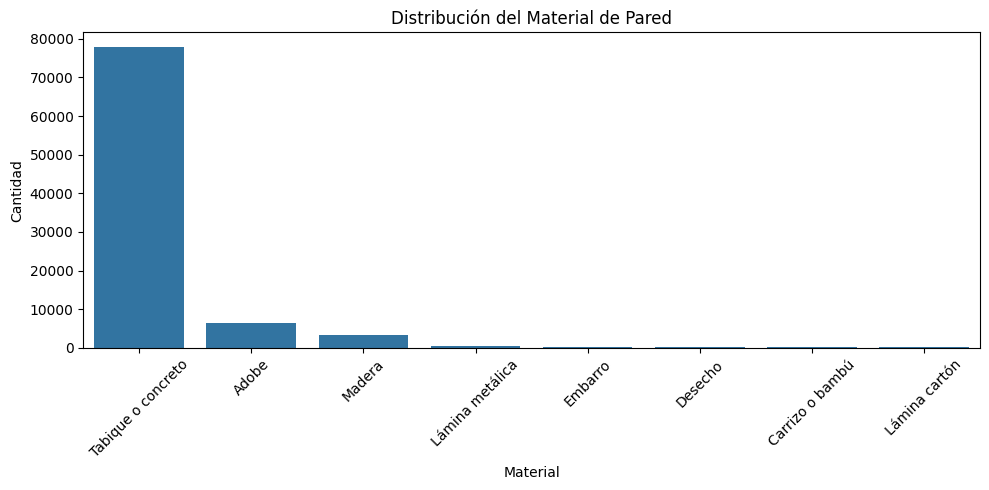

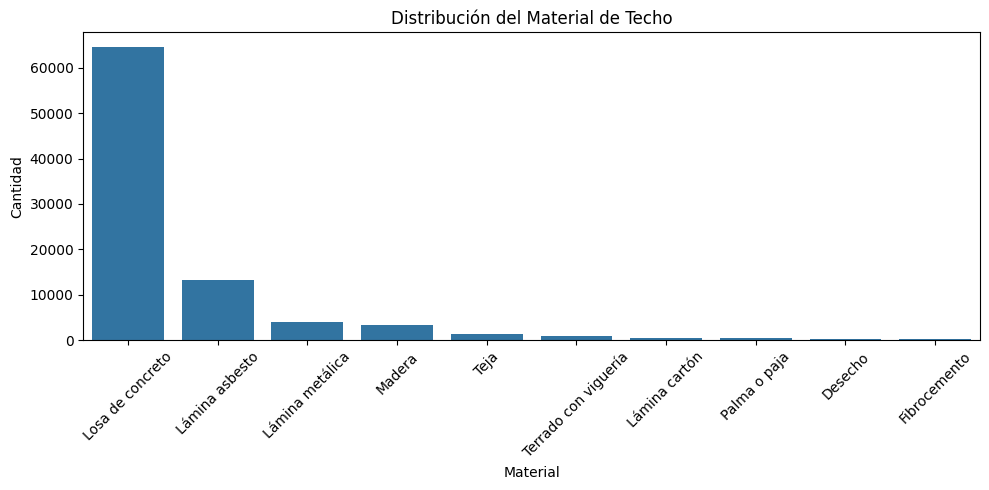

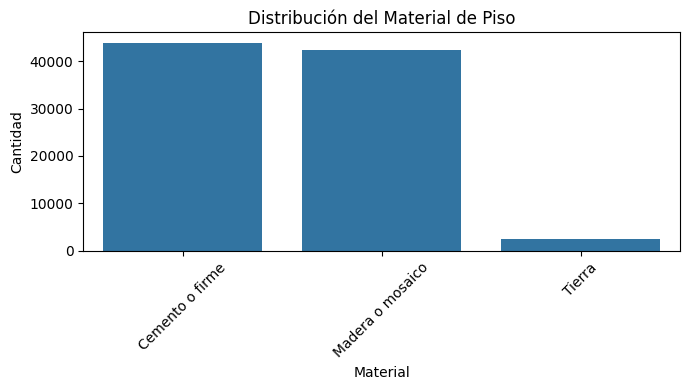

In [27]:
# Material de paredes
plt.figure(figsize=(10,5))
sns.countplot(data=pdf, x="mat_pared", order=pdf["mat_pared"].value_counts().index)
plt.title("Distribución del Material de Pared")
plt.xlabel("Material")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Material de techos
plt.figure(figsize=(10,5))
sns.countplot(data=pdf, x="mat_techos", order=pdf["mat_techos"].value_counts().index)
plt.title("Distribución del Material de Techo")
plt.xlabel("Material")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Material de pisos
plt.figure(figsize=(7,4))
sns.countplot(data=pdf, x="mat_pisos", order=pdf["mat_pisos"].value_counts().index)
plt.title("Distribución del Material de Piso")
plt.xlabel("Material")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3.2.- Acceso a servicios básicos**

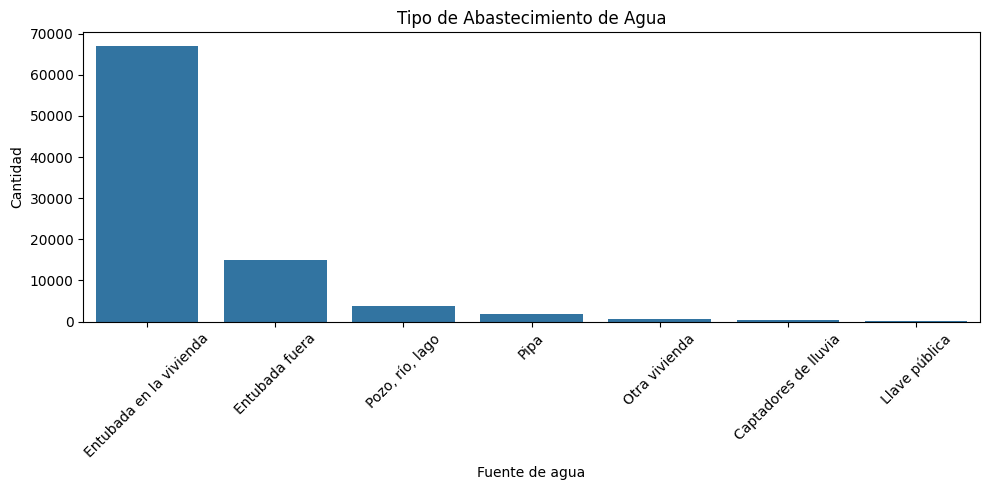

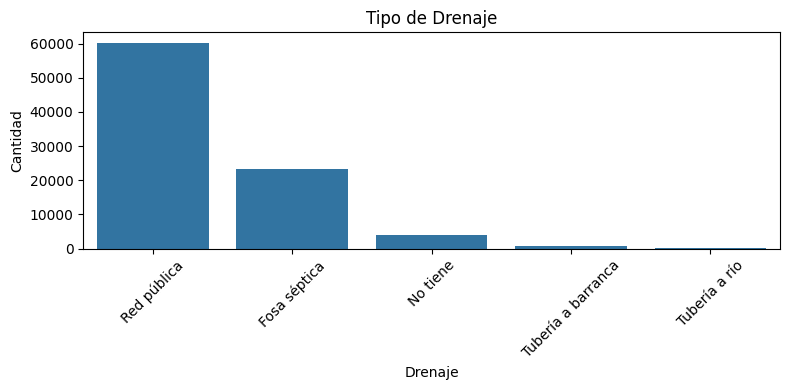

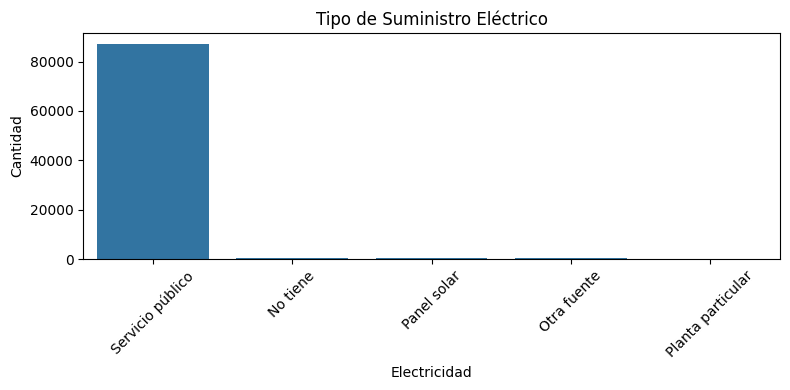

In [28]:
# Disponibilidad de agua
plt.figure(figsize=(10,5))
sns.countplot(data=pdf, x="disp_agua", order=pdf["disp_agua"].value_counts().index)
plt.title("Tipo de Abastecimiento de Agua")
plt.xlabel("Fuente de agua")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tipo de drenaje
plt.figure(figsize=(8,4))
sns.countplot(data=pdf, x="drenaje", order=pdf["drenaje"].value_counts().index)
plt.title("Tipo de Drenaje")
plt.xlabel("Drenaje")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tipo de electricidad
plt.figure(figsize=(8,4))
sns.countplot(data=pdf, x="disp_elect", order=pdf["disp_elect"].value_counts().index)
plt.title("Tipo de Suministro Eléctrico")
plt.xlabel("Electricidad")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3.3.-Condiciones sanitarias y espacios**

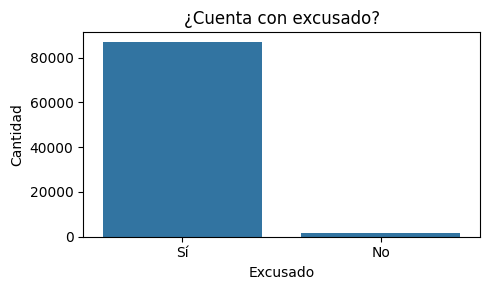

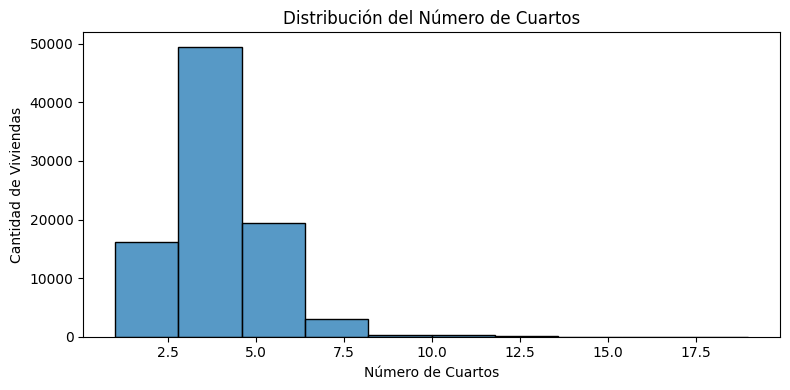

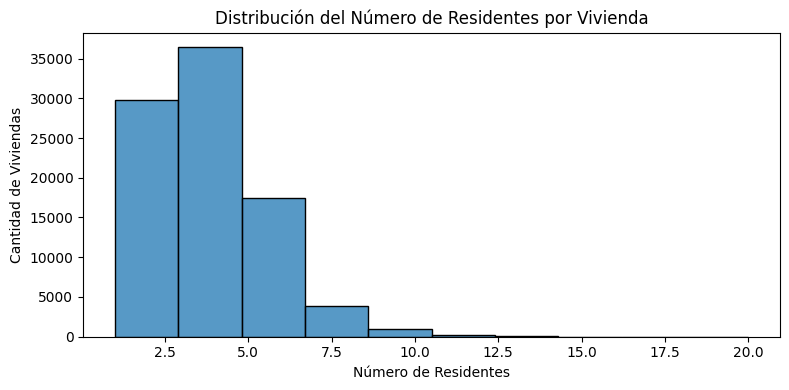

In [29]:
# Disponibilidad de excusado
plt.figure(figsize=(5,3))
sns.countplot(data=pdf, x="excusado")
plt.title("¿Cuenta con excusado?")
plt.xlabel("Excusado")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

# Número de cuartos por vivienda
plt.figure(figsize=(8,4))
sns.histplot(data=pdf, x="num_cuarto", bins=10, kde=False)
plt.title("Distribución del Número de Cuartos")
plt.xlabel("Número de Cuartos")
plt.ylabel("Cantidad de Viviendas")
plt.tight_layout()
plt.show()

# Número de residentes
plt.figure(figsize=(8,4))
sns.histplot(data=pdf, x="tot_resid", bins=10, kde=False)
plt.title("Distribución del Número de Residentes por Vivienda")
plt.xlabel("Número de Residentes")
plt.ylabel("Cantidad de Viviendas")
plt.tight_layout()
plt.show()


**3.4.- Distribucion por ubicacion**

In [54]:
df_limpio = df_limpio.with_columns(
    (pl.col("ubica_geo") // 1000).alias("cve_estado")
)

mapa_estados = {
    1: "Aguascalientes", 2: "Baja California", 3: "Baja California Sur", 4: "Campeche",
    5: "Coahuila", 6: "Colima", 7: "Chiapas", 8: "Chihuahua", 9: "Ciudad de México",
    10: "Durango", 11: "Guanajuato", 12: "Guerrero", 13: "Hidalgo", 14: "Jalisco",
    15: "México", 16: "Michoacán", 17: "Morelos", 18: "Nayarit", 19: "Nuevo León",
    20: "Oaxaca", 21: "Puebla", 22: "Querétaro", 23: "Quintana Roo", 24: "San Luis Potosí",
    25: "Sinaloa", 26: "Sonora", 27: "Tabasco", 28: "Tamaulipas", 29: "Tlaxcala",
    30: "Veracruz", 31: "Yucatán", 32: "Zacatecas"
}

# Convertimos el tipo de dato por si acaso y aplicamos el mapeo
df_limpio = df_limpio.with_columns(
    pl.col("cve_estado").cast(pl.Int64).map_elements(lambda x: mapa_estados.get(x, "Desconocido")).alias("estado")
)

/tmp/ipykernel_8381/3308000312.py:16: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  df_limpio = df_limpio.with_columns(


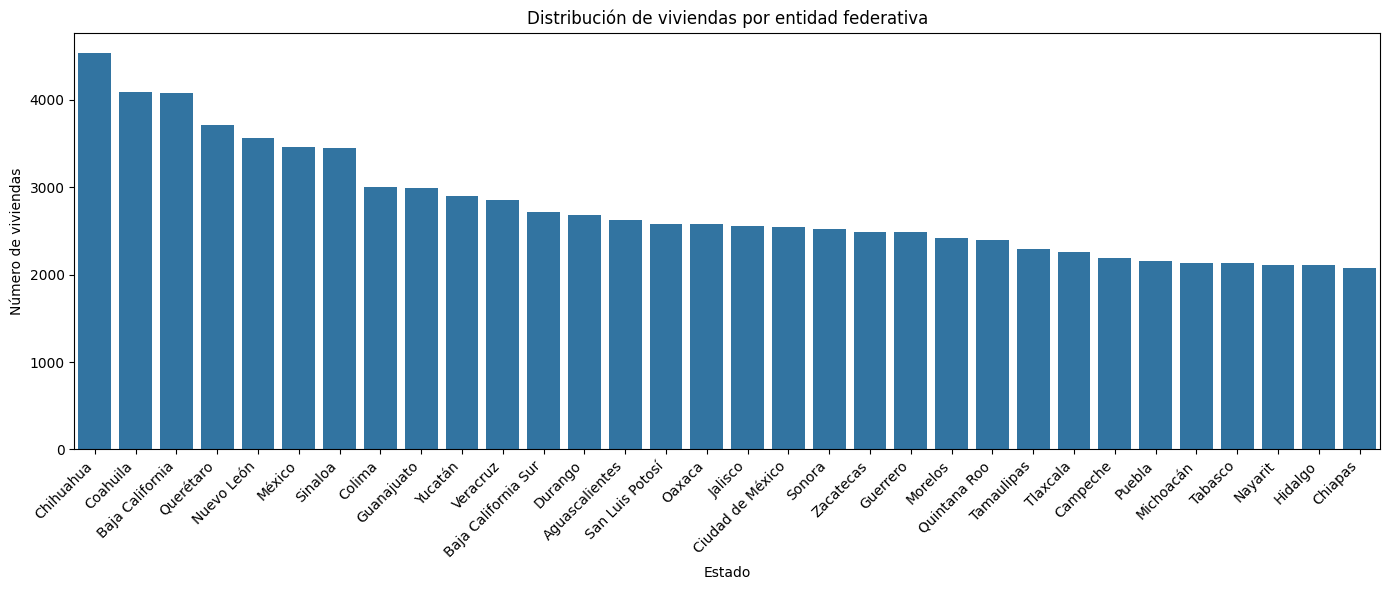

In [56]:
plt.figure(figsize=(14,6))
sns.countplot(data=pdf, x="estado", order=pdf["estado"].value_counts().index)
plt.xticks(rotation=45, ha="right")
plt.title("Distribución de viviendas por entidad federativa")
plt.xlabel("Estado")
plt.ylabel("Número de viviendas")
plt.tight_layout()
plt.show()
